In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.base import BaseEstimator, TransformerMixin

In [3]:
class coluna_target(BaseEstimator, TransformerMixin):
    def __init__(self, column_name):
        self.column_name = column_name
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return pd.pivot_table(data=X[['Section', 'date', self.column_name]], index='date', columns='Section', aggfunc=sum)

In [4]:
class secaoTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X.groupby('validdate').mean().drop(['lat', 'lon'], axis=1)
secaot = secaoTransformer()

In [5]:
covid = pd.read_csv('COVID_DATA_STATE.csv')
covid = covid.sort_values('date')
values = covid[['date', 'Section', 'positive', 'death', 'deathIncrease', 'positiveIncrease']].copy()

In [6]:
maxachutes=pd.read_csv('maxaxuxets.csv',sep=';')
florida=pd.read_csv('florida',sep=';')
texas=pd.read_csv('texas',sep=';')
california=pd.read_csv('california.csv',sep=';')
illinois=pd.read_csv('illinois.csv',sep=';')

In [7]:
def renomear_colunas(matriz):
    matriz=matriz.rename(columns={"t_2m:C":"Temperature at 2 meters above ground in Celsius",
                                     "relative_humidity_2m:p":"Relative humidity at 2m above ground in %",
                                     "wind_speed_10m:kmh":"Wind speed at 10m above ground in km/h",
                                     "air_density_10m:kgm3":"Air density at 10m above ground in kg/m^3",
                                     "precip_24h:mm":"Preciptation in 24h period in mm",
                                     "co:ugm3":"Carbon Monoxide concentration in micrograms/m^3"})
    return matriz

In [8]:
def fazer_matriz(estado_sigla,estado,numero,metodo):
    state = values[values.Section == estado_sigla]
    env = secaot.fit_transform(estado).iloc[:-2].copy()
    env=renomear_colunas(env)
    for target in ('positive', 'death', 'deathIncrease', 'positiveIncrease'):
        col = coluna_target(target)
        target_dataframe = col.fit_transform(state).iloc[numero:].copy()
        target_dataframe.index = env.index
        env = pd.concat([env, target_dataframe], axis=1)
    matriz_pearson=env.corr(method=metodo).iloc[0:6, -4:]
    plt.figure(figsize=(10,5))
    plt.title(f"Correlation between COVID-19 data and EO using {metodo} method")
    sns.heatmap(matriz_pearson,annot=True,fmt=".2f")
    plt.show()

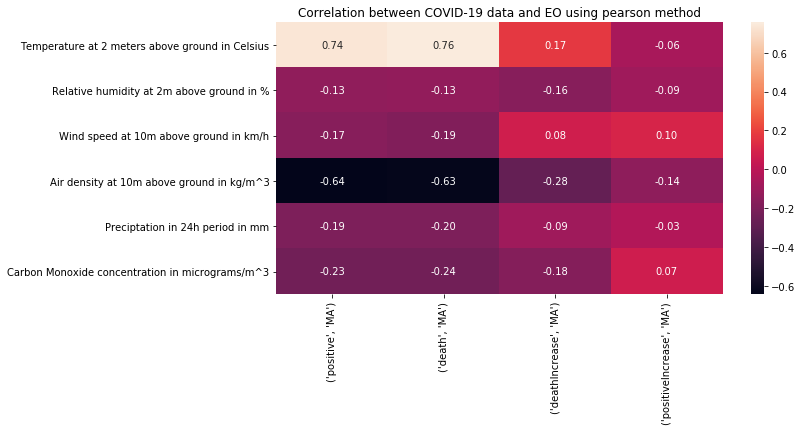

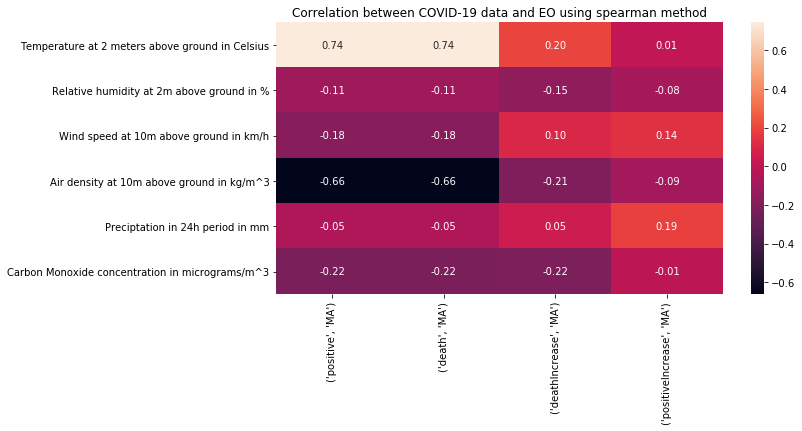

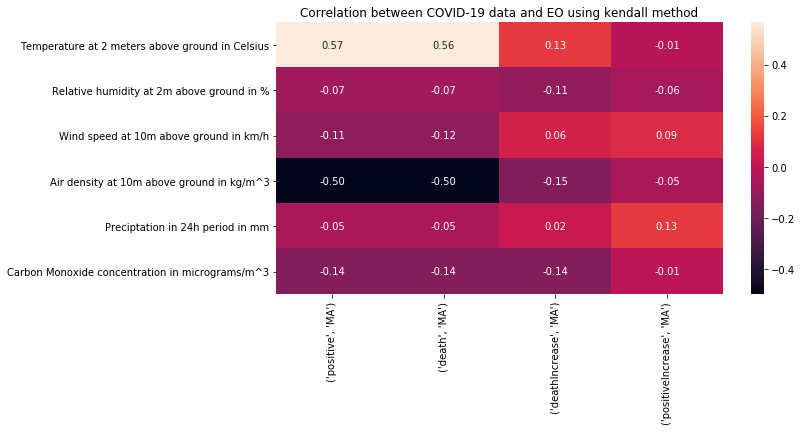

In [10]:
fazer_matriz('MA',maxachutes,3,'pearson')
fazer_matriz('MA',maxachutes,3,'spearman')
fazer_matriz('MA',maxachutes,3,'kendall')

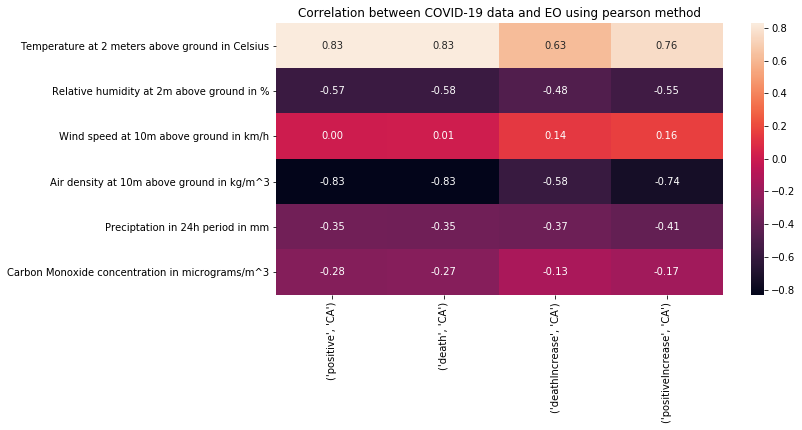

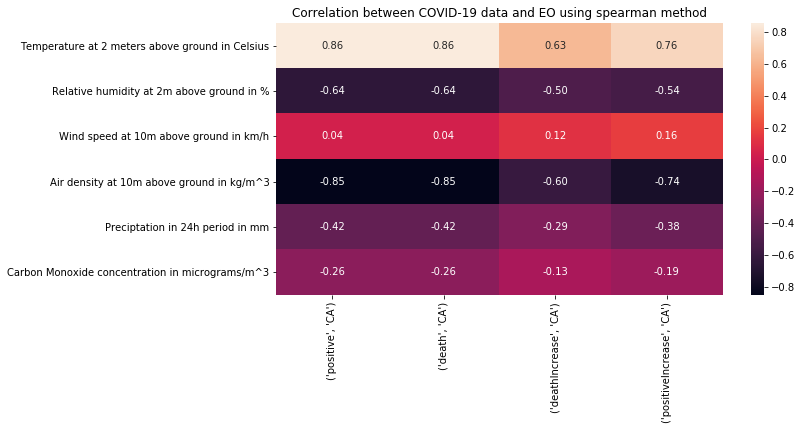

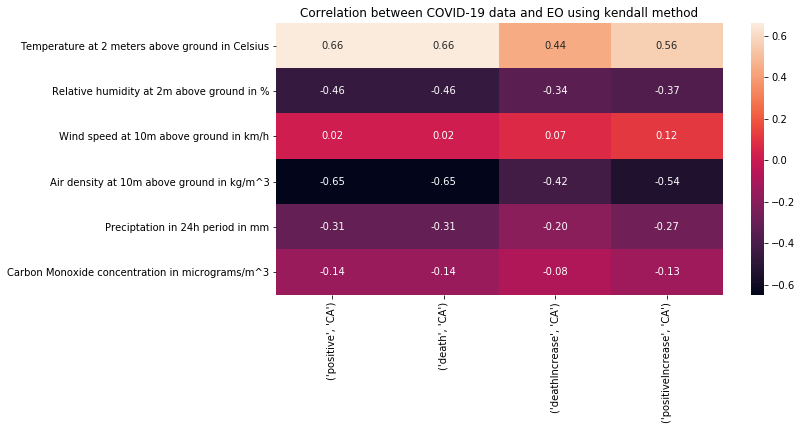

In [11]:
fazer_matriz('CA',california,11,'pearson')
fazer_matriz('CA',california,11,'spearman')
fazer_matriz('CA',california,11,'kendall')

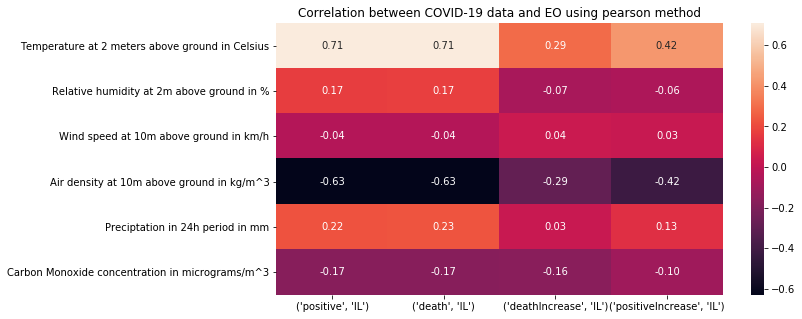

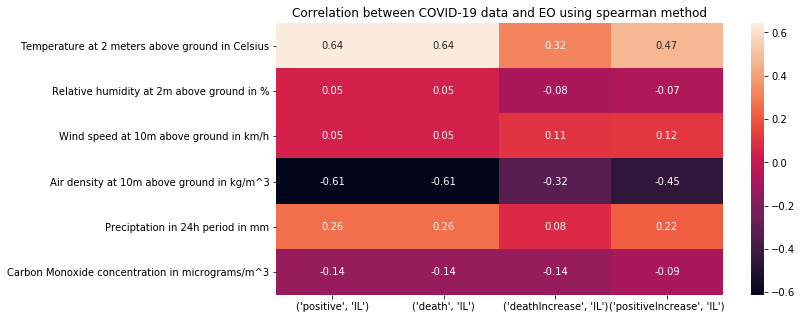

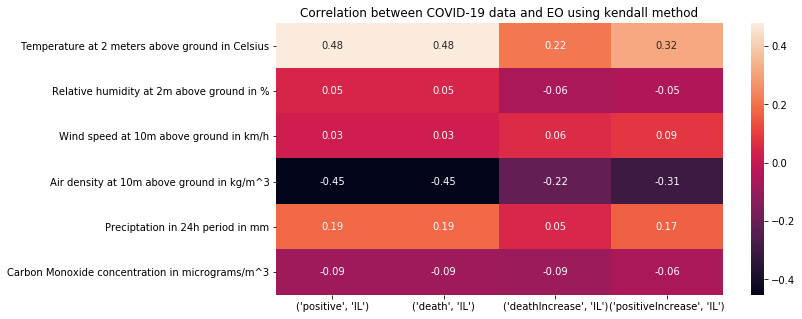

In [12]:
fazer_matriz('IL',illinois,11,'pearson')
fazer_matriz('IL',illinois,11,'spearman')
fazer_matriz('IL',illinois,11,'kendall')

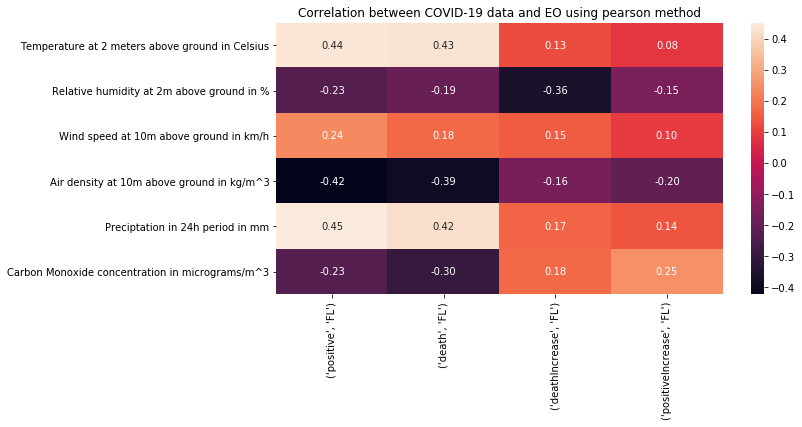

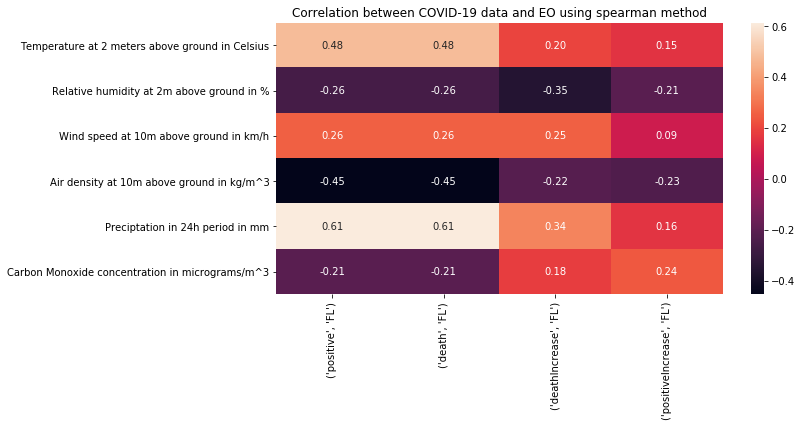

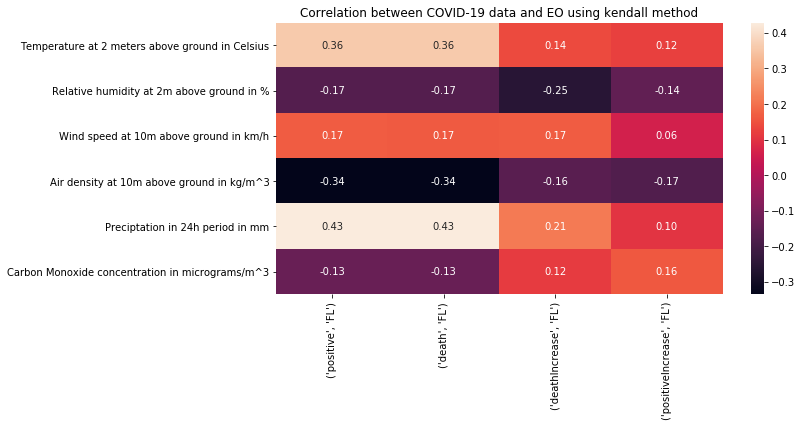

In [13]:
fazer_matriz('FL',florida,11,'pearson')
fazer_matriz('FL',florida,11,'spearman')
fazer_matriz('FL',florida,11,'kendall')

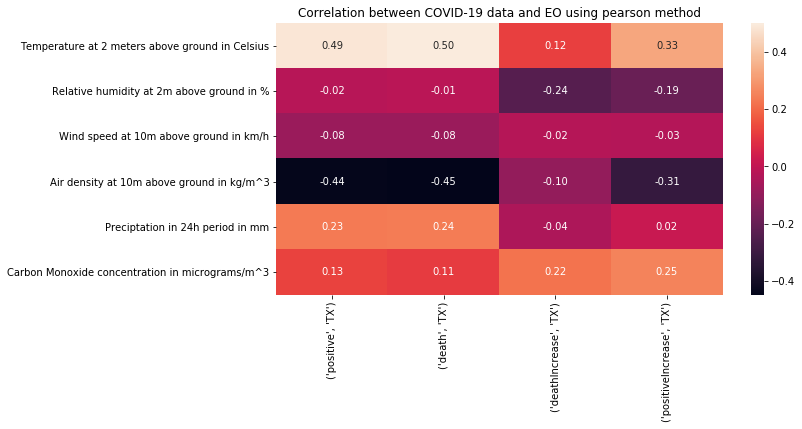

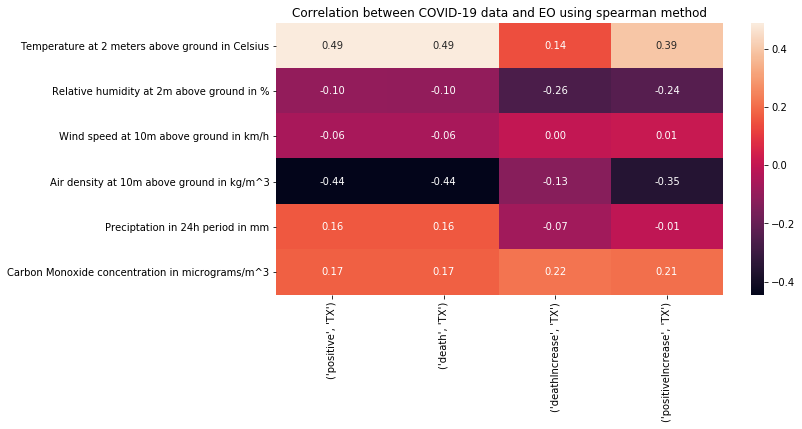

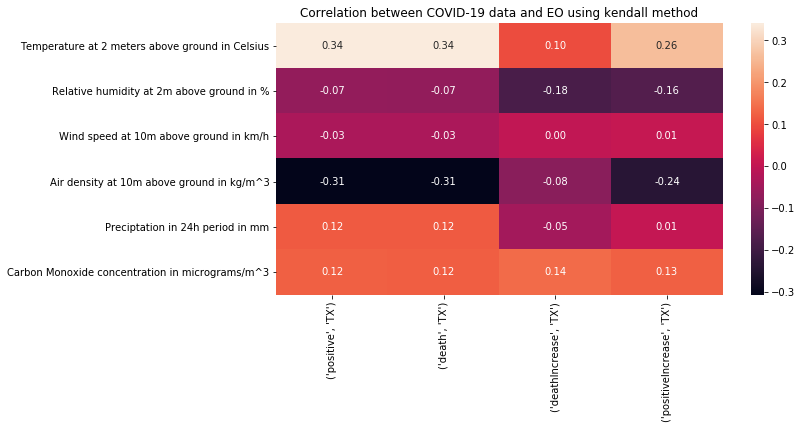

In [14]:
fazer_matriz('TX',texas,11,'pearson')
fazer_matriz('TX',texas,11,'spearman')
fazer_matriz('TX',texas,11,'kendall')